In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv(r"C:\Users\vedan\Downloads\train.csv")
test= pd.read_csv(r"C:\Users\vedan\Downloads\test.csv")
data 

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [94]:
data.fillna(data.mean(), inplace=True)
features = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'OverallQual']
target = ['SalePrice']

mean_values = data[features].mean()
std_values = data[features].std()
data[features] = (data[features] - mean_values) / std_values
print(data)

x = data[features]
x['intercept']=1
x=x.values.T
y = data[target].values.T

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0        0.656409   0.569608   -1.044836   -1.111755    -0.069209 -0.084179   
1        0.656409   0.237557   -1.044836   -1.111755    -0.312009 -0.638238   
2       -0.810932  -0.392195    0.303637    0.036325    -0.294024 -0.617622   
3        2.857421   1.680261    1.652111    0.920911     4.579950  3.186057   
4        0.656409  -0.512420    0.303637   -0.349505     0.405149  0.225063   
...           ...        ...         ...         ...          ...       ...   
1163    -0.077262  -0.231894    0.303637   -0.170706    -0.865052 -1.272184   
1164     0.656409  -0.094494    0.303637   -0.349505    -1.512517 -0.937172   
1165    -0.810932  -1.397889   -1.044836   -1.064703    -0.602019 -0.970673   
1166    -0.077262   0.266182   -1.044836   -0.467137    -0.145646  1.276487   
1167     0.656409  -0.151744    0.303637    0.111609     0.825552  0.712120   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [96]:
def model(x,y,rate,iteration):
    m=y.size
    global theta
    theta=np.zeros((1,11))
    global cost_list
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(theta,x)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot(y_pred-y,x.T)
        theta=theta-rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print(cost)
    return theta,cost_list[-1]


In [97]:
model(x,y,0.0001,1000000)

19608941954.06892
760176424.9965925
759145582.191873
759068596.2141216
759061050.520595
759060192.2396455
759060086.5171636
759060072.9862616
759060071.2235565
759060070.992038


(array([[ 25819.64594176,   8637.95999208,   3404.26906157,
           7276.43741   ,   6179.25435154,  -3282.52543769,
            715.05627921,   7558.08119274,   6096.59650433,
          26836.68852155, 181223.59160944]]),
 759060070.9615136)

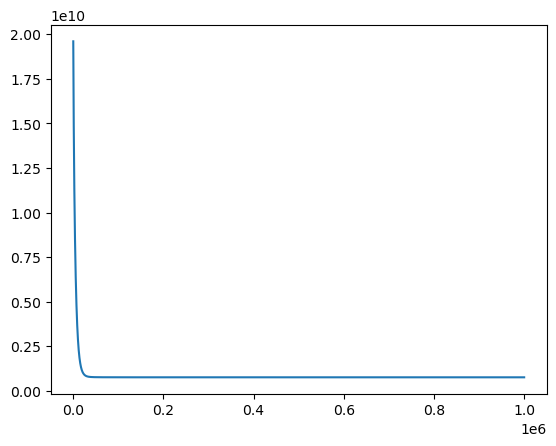

In [98]:
rng=np.arange(0,1000000)
plt.plot(rng,cost_list)
plt.show()

In [132]:
mean_values = test[features].mean()
std_values = test[features].std()
test[features] = (test[features] - mean_values) / std_values
x_test = test[features].values.T
y_test = test[target].values.T
def predict(x, theta,b):
    return theta.dot(x)+b
y_pred = predict(x_test, theta[:,:-1],theta[:,-1])

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
print("Accuracy is",r2score(y_pred, y_test)*100,"%")

Accuracy is 82.14846861473688 %
